In [17]:
import cv2
import os
import numpy as np
import cv2
import os



def preprocess_image(image_path):
    """Preprocessing for OCR using grayscale conversion and adaptive thresholding."""
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Adaptive Thresholding
    processed_image = cv2.adaptiveThreshold(
        gray_image,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,  
        15,  # Block size for adaptive thresholding
        5    # Constant subtracted from the mean
    )

    

    return processed_image

def process_images_in_folder(source_folder, target_folder):
    """Process all images in a source folder and save them to a target folder."""
    # Ensure target folder exists
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Iterate through each file in the source folder
    for filename in os.listdir(source_folder):
        file_path = os.path.join(source_folder, filename)

        # Check if it's an image file
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"Processing: {filename}")
            # Preprocess the image
            processed_image = preprocess_image(file_path)

            # Save the processed image to the target folder
            save_path = os.path.join(target_folder, filename)
            cv2.imwrite(save_path, processed_image)
            print(f"Saved: {save_path}")


# Example usage
source_folder = 'images'  # Replace with the actual source folder path
target_folder = 'multi_process'  # Replace with the actual target folder path

process_images_in_folder(source_folder, target_folder)


Processing: 41-NCxNuBxL.jpg
Saved: multi_process\41-NCxNuBxL.jpg
Processing: 417NJrPEk+L.jpg
Saved: multi_process\417NJrPEk+L.jpg
Processing: 417SThj+SrL.jpg
Saved: multi_process\417SThj+SrL.jpg
Processing: 41ADVPQgZOL.jpg
Saved: multi_process\41ADVPQgZOL.jpg
Processing: 41nblnEkJ3L.jpg
Saved: multi_process\41nblnEkJ3L.jpg
Processing: 41o3iis9E7L.jpg
Saved: multi_process\41o3iis9E7L.jpg
Processing: 41pvwR9GbaL.jpg
Saved: multi_process\41pvwR9GbaL.jpg
Processing: 41uwo4PVnuL.jpg
Saved: multi_process\41uwo4PVnuL.jpg
Processing: 41ygXRvf8lL.jpg
Saved: multi_process\41ygXRvf8lL.jpg
Processing: 41zgjN+zW3L.jpg
Saved: multi_process\41zgjN+zW3L.jpg
Processing: 51+oHGvSvuL.jpg
Saved: multi_process\51+oHGvSvuL.jpg
Processing: 51-WIOx5pxL.jpg
Saved: multi_process\51-WIOx5pxL.jpg
Processing: 510xYFNYQ8L.jpg
Saved: multi_process\510xYFNYQ8L.jpg
Processing: 514bY8c4ZIL.jpg
Saved: multi_process\514bY8c4ZIL.jpg
Processing: 514pScQdlCL.jpg
Saved: multi_process\514pScQdlCL.jpg
Processing: 51BEuVR4ZzL.j

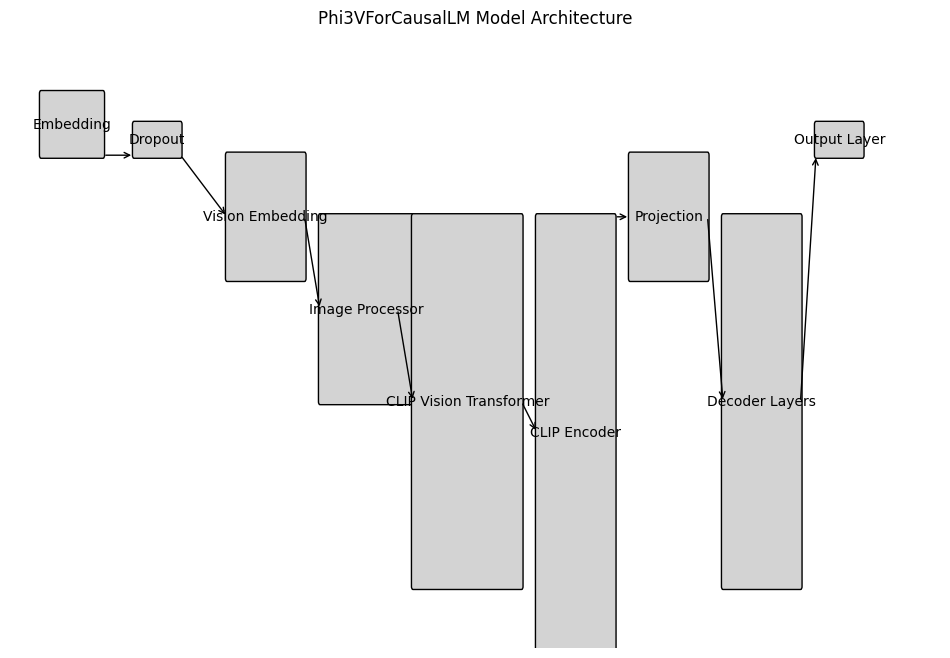

In [18]:
# Let's visualize the architecture of the Phi3VForCausalLM model using a simple diagram.
# For this, we'll use the 'matplotlib' library to create a plot that represents the model's components in a simplified manner.

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define the positions and sizes of the main blocks
blocks = {
    'Embedding': (1, 8, 2, 1),
    'Dropout': (4, 8, 1.5, 0.5),
    'Vision Embedding': (7, 6, 2.5, 2),
    'Image Processor': (10, 4, 3, 3),
    'CLIP Vision Transformer': (13, 1, 3.5, 6),
    'CLIP Encoder': (17, 0, 2.5, 7),
    'Projection': (20, 6, 2.5, 2),
    'Decoder Layers': (23, 1, 2.5, 6),
    'Output Layer': (26, 8, 1.5, 0.5)
}

# Draw the blocks
for block, (x, y, w, h) in blocks.items():
    rect = mpatches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.05", edgecolor='black', facecolor='lightgrey')
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, block, ha='center', va='center', fontsize=10)

# Draw arrows to represent connections
connections = [
    ((3, 8), (4, 8)),  # Embedding to Dropout
    ((5.5, 8), (7, 7)),  # Dropout to Vision Embedding
    ((9.5, 7), (10, 5.5)),  # Vision Embedding to Image Processor
    ((12.5, 5.5), (13, 4)),  # Image Processor to CLIP Vision Transformer
    ((16.5, 4), (17, 3.5)),  # CLIP Vision Transformer to CLIP Encoder
    ((19.5, 7), (20, 7)),  # CLIP Encoder to Projection
    ((22.5, 7), (23, 4)),  # Projection to Decoder Layers
    ((25.5, 4), (26, 8))  # Decoder Layers to Output Layer
]

for start, end in connections:
    ax.annotate('', xy=end, xytext=start, arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set plot limits and remove axes
ax.set_xlim(0, 30)
ax.set_ylim(0, 10)
ax.axis('off')

# Show the plot
plt.title('Phi3VForCausalLM Model Architecture')
plt.show()


In [19]:

# coding=utf-8
# Copyright 2024 Microsoft and the HuggingFace Inc. team. All rights reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""
Processor class for Phi3-V.
"""
import re
from typing import List, Optional, Union

import torch

import transformers
from transformers.feature_extraction_utils import BatchFeature
from transformers.image_utils import ImageInput
from transformers.processing_utils import ProcessorMixin
from transformers.tokenization_utils_base import PaddingStrategy, TextInput, TruncationStrategy
from transformers.utils import TensorType


"""Image processor class for Phi3-V."""

from typing import List, Optional, Union

import numpy as np

from transformers.image_processing_utils import BaseImageProcessor, BatchFeature
from transformers.image_transforms import (
    convert_to_rgb,
)
from transformers.image_utils import (
    OPENAI_CLIP_MEAN,
    OPENAI_CLIP_STD,
    ImageInput,
    make_list_of_images,
    valid_images,
)
from transformers.utils import TensorType, is_vision_available, logging

from transformers import AutoImageProcessor

logger = logging.get_logger(__name__)


if is_vision_available():
    from PIL import Image

import torch
import torchvision

def padding_336(b):
    width, height = b.size
    tar = int(np.ceil(height / 336) * 336)
    top_padding = int((tar - height)/2)
    bottom_padding = tar - height - top_padding
    left_padding = 0
    right_padding = 0
    b = torchvision.transforms.functional.pad(b, [left_padding, top_padding, right_padding, bottom_padding], fill=[255,255,255])

    return b

def calc_padded_size(width, height, padding_unit=336):  
    target_height = int(np.ceil(height / padding_unit) * padding_unit)  
    top_padding = int((target_height - height) / 2)  
    bottom_padding = target_height - height - top_padding  
    left_padding = 0  
    right_padding = 0  
    padded_width = width + left_padding + right_padding  
    padded_height = height + top_padding + bottom_padding  
    return padded_width, padded_height  

def HD_transform(img, hd_num=16):
    width, height = img.size
    trans = False
    if width < height:
        img = img.transpose(Image.TRANSPOSE)
        trans = True
        width, height = img.size
    ratio = (width/ height)
    scale = 1
    while scale*np.ceil(scale/ratio) <= hd_num:
        scale += 1
    scale -= 1
    new_w = int(scale * 336)
    new_h = int(new_w / ratio)

    img = torchvision.transforms.functional.resize(img, [new_h, new_w],)
    img = padding_336(img)
    width, height = img.size
    if trans:
        img = img.transpose(Image.TRANSPOSE)

    return img

def calc_hd_transform_size(width, height, hd_num=16):  
    transposed = False  
    if width < height:  
        width, height = height, width  
        transposed = True  
  
    ratio = width / height  
    scale = 1  
    while scale * np.ceil(scale / ratio) <= hd_num:  
        scale += 1  
    scale -= 1  
  
    new_width = int(scale * 336)  
    new_height = int(new_width / ratio)  
  
    padded_width, padded_height = calc_padded_size(new_width, new_height)  
      
    if transposed:  
        padded_width, padded_height = padded_height, padded_width  
  
    return padded_width, padded_height  

def pad_to_max_num_crops_tensor(images, max_crops=5):
    """
    images: B x 3 x H x W, B<=max_crops
    """
    B, _, H, W = images.shape
    if B < max_crops:
        pad = torch.zeros(max_crops - B, 3, H, W, dtype=images.dtype, device=images.device)
        images = torch.cat([images, pad], dim=0)
    return images


class Phi3VImageProcessor(BaseImageProcessor):
    r"""
    Constructs a Phi3 image processor. Based on [`CLIPImageProcessor`] with incorporation of additional techniques
    for processing high resolution images as explained in the [InternLM-XComposer2-4KHD](https://arxiv.org/pdf/2404.06512)

    Args:
        image_mean (`float` or `List[float]`, *optional*, defaults to `[0.48145466, 0.4578275, 0.40821073]`):
            Mean to use if normalizing the image. This is a float or list of floats the length of the number of
            channels in the image. Can be overridden by the `image_mean` parameter in the `preprocess` method.
        image_std (`float` or `List[float]`, *optional*, defaults to `[0.26862954, 0.26130258, 0.27577711]`):
            Standard deviation to use if normalizing the image. This is a float or list of floats the length of the
            number of channels in the image. Can be overridden by the `image_std` parameter in the `preprocess` method.
            Can be overridden by the `image_std` parameter in the `preprocess` method.
        do_convert_rgb (`bool`, *optional*, defaults to `True`):
            Whether to convert the image to RGB.
    """

    model_input_names = ["pixel_values"]

    def __init__(
        self,
        num_crops: int = 1,
        image_mean: Optional[Union[float, List[float]]] = None,
        image_std: Optional[Union[float, List[float]]] = None,
        do_convert_rgb: bool = True,
        **kwargs,
    ) -> None:
        super().__init__(**kwargs)
        self.num_crops = num_crops
        self.image_mean = image_mean if image_mean is not None else OPENAI_CLIP_MEAN
        self.image_std = image_std if image_std is not None else OPENAI_CLIP_STD
        self.do_convert_rgb = do_convert_rgb
    
    def calc_num_image_tokens(
            self, 
            images: ImageInput 
    ):
        """ Calculate the number of image tokens for each image.
        Args:
            images (`ImageInput`):
                Image to preprocess. Expects a single or batch of images with pixel values ranging from 0 to 255. If
                passing in images with pixel values between 0 and 1, set `do_rescale=False`.
        """
        images = make_list_of_images(images)

        if not valid_images(images):
            raise ValueError(
                "Invalid image type. Must be of type PIL.Image.Image, numpy.ndarray, "
                "torch.Tensor, tf.Tensor or jax.ndarray."
            )

        images = [image.convert('RGB') for image in images]
        # (H, W, C)
        elems = [HD_transform(im, hd_num = self.num_crops) for im in images] 
        shapes = [[im.size[1], im.size[0]] for im in elems]
        num_img_tokens = [int((h//336*w//336+1)*144 + 1 + (h//336+1)*12) for h, w in shapes]
        return num_img_tokens

    def calc_num_image_tokens_from_image_size(self, width, height):
        """
        Calculate the number of image tokens for a given image size.
        Args:
            width (`int`): Width of the image.
            height (`int`): Height of the image.
        """
        new_width, new_height = calc_hd_transform_size(width, height, hd_num=self.num_crops)  
        num_img_tokens = int((new_height // 336 * new_width // 336 + 1) * 144 + 1 + (new_height // 336 + 1) * 12)  
        return num_img_tokens

    def preprocess(
        self,
        images: ImageInput,
        image_mean: Optional[Union[float, List[float]]] = None,
        image_std: Optional[Union[float, List[float]]] = None,
        do_convert_rgb: bool = None,
        return_tensors: Optional[Union[str, TensorType]] = None,
    ):
        """
        Args:
            images (`ImageInput`):
                Image to preprocess. Expects a single or batch of images with pixel values ranging from 0 to 255. If
                passing in images with pixel values between 0 and 1, set `do_rescale=False`.
            image_mean (`float` or `List[float]`, *optional*, defaults to `self.image_mean`):
                Image mean to use for normalization. Only has an effect if `do_normalize` is set to `True`.
            image_std (`float` or `List[float]`, *optional*, defaults to `self.image_std`):
                Image standard deviation to use for normalization. Only has an effect if `do_normalize` is set to
                `True`.
            do_convert_rgb (`bool`, *optional*, defaults to `self.do_convert_rgb`):
                Whether to convert the image to RGB.
            return_tensors (`str` or `TensorType`, *optional*):
                The type of tensors to return. Can be one of:
                - Unset: Return a list of `np.ndarray`.
                - `TensorType.TENSORFLOW` or `'tf'`: Return a batch of type `tf.Tensor`.
                - `TensorType.PYTORCH` or `'pt'`: Return a batch of type `torch.Tensor`.
                - `TensorType.NUMPY` or `'np'`: Return a batch of type `np.ndarray`.
                - `TensorType.JAX` or `'jax'`: Return a batch of type `jax.numpy.ndarray`.
        """
        image_mean = image_mean if image_mean is not None else self.image_mean
        image_std = image_std if image_std is not None else self.image_std
        do_convert_rgb = do_convert_rgb if do_convert_rgb is not None else self.do_convert_rgb

        images = make_list_of_images(images)

        if not valid_images(images):
            raise ValueError(
                "Invalid image type. Must be of type PIL.Image.Image, numpy.ndarray, "
                "torch.Tensor, tf.Tensor or jax.ndarray."
            )

        if do_convert_rgb:
            images = [convert_to_rgb(image) for image in images]

        image_sizes = []
        img_processor = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(image_mean, image_std)
        ])

        # PIL images
        # HD_transform pad images to size of multiiply of 336, 336
        # convert to RGB first
        images = [image.convert('RGB') for image in images]
        elems = [HD_transform(im, hd_num = self.num_crops) for im in images] 
        # tensor transform and normalize
        hd_images = [img_processor(im) for im in elems]
        # create global image 
        global_image = [torch.nn.functional.interpolate(im.unsqueeze(0).float(), size=(336, 336), mode='bicubic',).to(im.dtype) for im in hd_images]

        # [(3, h, w)], where h, w is multiple of 336
        shapes = [[im.size(1), im.size(2)] for im in hd_images]
        num_img_tokens = [int(((h//336)*(w//336)+1)*144 + 1 + (h//336+1)*12) for h, w in shapes]
        # reshape to channel dimension -> (num_images, num_crops, 3, 336, 336)
        # (1, 3, h//336, 336, w//336, 336) -> (1, h//336, w//336, 3, 336, 336) -> (h//336*w//336, 3, 336, 336)
        hd_images_reshape = [im.reshape(1, 3, h//336, 336, w//336, 336).permute(0,2,4,1,3,5).reshape(-1, 3, 336, 336).contiguous() for im, (h, w) in zip(hd_images, shapes)]
        # concat global image and local image
        hd_images_reshape = [torch.cat([_global_image] + [_im], dim=0) for _global_image, _im in zip(global_image, hd_images_reshape)]

        # pad to max_num_crops
        image_transformed = [pad_to_max_num_crops_tensor(im, self.num_crops+1) for im in hd_images_reshape]
        image_transformed = torch.stack(image_transformed, dim=0)
        image_sizes = [torch.LongTensor(_shapes) for _shapes in shapes]
        padded_images = image_transformed
        image_sizes = shapes

        data = {"pixel_values": padded_images, 
                "image_sizes": image_sizes,
                "num_img_tokens": num_img_tokens
                }

        return BatchFeature(data=data, tensor_type=return_tensors)

AutoImageProcessor.register("Phi3VImageProcessor", Phi3VImageProcessor)

transformers.Phi3VImageProcessor = Phi3VImageProcessor 

class Phi3VProcessor(ProcessorMixin):
    r"""
    Constructs a Phi3-V processor which wraps a Phi3-V image processor and a LLaMa tokenizer into a single processor.

    [`Phi3VProcessor`] offers all the functionalities of [`Phi3VImageProcessor`] and [`LlamaTokenizerFast`]. See the
    [`~Phi3VProcessor.__call__`] and [`~Phi3VProcessor.decode`] for more information.

    Args:
        image_processor ([`Phi3VImageProcessor`], *optional*):
            The image processor is a required input.
        tokenizer ([`LlamaTokenizerFast`], *optional*):
            The tokenizer is a required input.
    """

    attributes = ["image_processor", "tokenizer"]
    image_processor_class = "Phi3VImageProcessor"
    tokenizer_class = ("LlamaTokenizer", "LlamaTokenizerFast")
    special_image_token = "<|image|>"

    def __init__(self, image_processor, tokenizer):
        self.image_processor = image_processor
        self.tokenizer = tokenizer
        self.num_img_tokens = image_processor.num_img_tokens
        self.img_tokens = [f"<|image_{i+1}|>" for i in range(1000000)]

    def __call__(
        self,
        text: Union[TextInput, List[TextInput]],
        images: ImageInput = None,
        padding: Union[bool, str, PaddingStrategy] = False,
        truncation: Union[bool, str, TruncationStrategy] = None,
        max_length=None,
        return_tensors: Optional[Union[str, TensorType]] = TensorType.PYTORCH,
    ) -> BatchFeature:
        """
        Main method to prepare for the model one or several sequences(s) and image(s). This method forwards the `text`
        and `kwargs` arguments to LlamaTokenizerFast's [`~LlamaTokenizerFast.__call__`] if `text` is not `None` to encode
        the text. To prepare the image(s), this method forwards the `images` and `kwrags` arguments to
        Phi3ImageProcessor's [`~Phi3ImageProcessor.__call__`] if `images` is not `None`. Please refer to the doctsring
        of the above two methods for more information.

        Args:
            text (`str`, `List[str]`, `List[List[str]]`):
                The sequence or batch of sequences to be encoded. Each sequence can be a string or a list of strings
                (pretokenized string). If the sequences are provided as list of strings (pretokenized), you must set
                `is_split_into_words=True` (to lift the ambiguity with a batch of sequences).
            images (`PIL.Image.Image`, `np.ndarray`, `torch.Tensor`, `List[PIL.Image.Image]`, `List[np.ndarray]`, `List[torch.Tensor]`):
                The image or batch of images to be prepared. Each image can be a PIL image, NumPy array or PyTorch
                tensor. Both channels-first and channels-last formats are supported.
            padding (`bool`, `str` or [`~utils.PaddingStrategy`], *optional*, defaults to `False`):
                Select a strategy to pad the returned sequences (according to the model's padding side and padding
                index) among:
                - `True` or `'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
                  sequence if provided).
                - `'max_length'`: Pad to a maximum length specified with the argument `max_length` or to the maximum
                  acceptable input length for the model if that argument is not provided.
                - `False` or `'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of different
                  lengths).
            max_length (`int`, *optional*):
                Maximum length of the returned list and optionally padding length (see above).
            truncation (`bool`, *optional*):
                Activates truncation to cut input sequences longer than `max_length` to `max_length`.
            return_tensors (`str` or [`~utils.TensorType`], *optional*):
                If set, will return tensors of a particular framework. Acceptable values are:

                - `'tf'`: Return TensorFlow `tf.constant` objects.
                - `'pt'`: Return PyTorch `torch.Tensor` objects.
                - `'np'`: Return NumPy `np.ndarray` objects.
                - `'jax'`: Return JAX `jnp.ndarray` objects.

        Returns:
            [`BatchFeature`]: A [`BatchFeature`] with the following fields:

            - **input_ids** -- List of token ids to be fed to a model. Returned when `text` is not `None`.
            - **attention_mask** -- List of indices specifying which tokens should be attended to by the model (when
              `return_attention_mask=True` or if *"attention_mask"* is in `self.model_input_names` and if `text` is not
              `None`).
            - **pixel_values** -- Pixel values to be fed to a model. Returned when `images` is not `None`.
        """
        if images is not None:
            image_inputs = self.image_processor(images, return_tensors=return_tensors)
        else:
            image_inputs = {}
        inputs = self._convert_images_texts_to_inputs(image_inputs, text, padding=padding, truncation=truncation, max_length=max_length, return_tensors=return_tensors)
        return inputs

    def calc_num_image_tokens(self, images: ImageInput):
        """ Calculate the number of image tokens for each image.
        Args:
            images (`ImageInput`):
                Image to preprocess. Expects a single or batch of images with pixel values ranging from 0 to 255. If
                passing in images with pixel values between 0 and 1, set `do_rescale=False`.
        """
        return self.image_processor.calc_num_image_tokens(images)
        
    def calc_num_image_tokens_from_image_size(self, width, height):
        """ Calculate the number of image token for an image with given width and height.
        Args:
            width (`int`):
                Width of the image.
            height (`int`):
                Height of the image.
        """
        return self.image_processor.calc_num_image_tokens_from_image_size(width, height)
    
    
    @property 
    def special_image_token_id(self):
        return self.tokenizer.convert_tokens_to_ids(self.special_image_token)

    def get_special_image_token_id(self):
        return self.tokenizer.convert_tokens_to_ids(self.special_image_token)
    
    def _convert_images_texts_to_inputs(self, images, texts, padding=False, truncation=None, max_length=None, return_tensors=None):

        if not len(images):
            model_inputs = self.tokenizer(texts, return_tensors=return_tensors, padding=padding, truncation=truncation, max_length=max_length)
            return BatchFeature(data={**model_inputs})

        pattern = r"<\|image_\d+\|>"
        prompt_chunks = [self.tokenizer(chunk).input_ids for chunk in re.split(pattern, texts)] 

        if 'num_img_tokens' in images:
            num_img_tokens = images['num_img_tokens']
        else:
            assert 'num_crops' in images, 'num_crops must be provided in images if num_img_tokens is not provided'
            num_crops = images['num_crops']
            num_img_tokens = [_num_crops * self.num_img_tokens for _num_crops in num_crops] 

        images, image_sizes = images['pixel_values'], images['image_sizes']

        # image_tags needs to start from 1 to n
        image_tags = re.findall(pattern, texts) 
        # image_ids = [int(s.split("|")[1].split("_")[-1]) * -1 for s in image_tags]
        # image_ids_pad = [[iid]*num_img_tokens[i] for i, iid in enumerate(image_ids)]
        image_ids = [int(s.split("|")[1].split("_")[-1]) for s in image_tags]
        unique_image_ids = sorted(list(set(image_ids)))
        # image_ids must start from 1, and must be continuous int, e.g. [1, 2, 3], cannot be [1, 4, 5]
        # check the condition
        assert unique_image_ids == list(range(1, len(unique_image_ids)+1)), f"image_ids must start from 1, and must be continuous int, e.g. [1, 2, 3], cannot be {unique_image_ids}"
        # total images must be the same as the number of image tags
        assert len(unique_image_ids) == len(images), f"total images must be the same as the number of image tags, got {len(unique_image_ids)} image tags and {len(images)} images"

        image_ids_pad = [[-iid]*num_img_tokens[iid-1] for iid in image_ids]

        def insert_separator(X, sep_list):
            if len(X) > len(sep_list):
                sep_list.append([])
            return [ele for sublist in zip(X, sep_list) for ele in sublist]
        input_ids = []
        offset = 0                
        for x in insert_separator(prompt_chunks, image_ids_pad):
            input_ids.extend(x[offset:])

        input_ids = torch.tensor(input_ids, dtype=torch.long).unsqueeze(0)
        attention_mask = (input_ids > -1000000).to(torch.long)

        return BatchFeature(data={"input_ids": input_ids,
                                  "attention_mask": attention_mask,
                                  "pixel_values": images, 
                                  "image_sizes": image_sizes})


    # Copied from transformers.models.clip.processing_clip.CLIPProcessor.batch_decode with CLIP->Llama
    def batch_decode(self, *args, **kwargs):
        """
        This method forwards all its arguments to LlamaTokenizerFast's [`~PreTrainedTokenizer.batch_decode`]. Please
        refer to the docstring of this method for more information.
        """
        return self.tokenizer.batch_decode(*args, **kwargs)

    # Copied from transformers.models.clip.processing_clip.CLIPProcessor.decode with CLIP->Llama
    def decode(self, *args, **kwargs):
        """
        This method forwards all its arguments to LlamaTokenizerFast's [`~PreTrainedTokenizer.decode`]. Please refer to
        the docstring of this method for more information.
        """
        return self.tokenizer.decode(*args, **kwargs)

    @property
    # Copied from transformers.models.clip.processing_clip.CLIPProcessor.model_input_names
    def model_input_names(self):
        tokenizer_input_names = self.tokenizer.model_input_names
        image_processor_input_names = self.image_processor.model_input_names
        return list(dict.fromkeys(tokenizer_input_names + image_processor_input_names))


ModuleNotFoundError: No module named 'torchviz'